In [2]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame dengan kolom tambahan (Pekerjaan, Hobi, Gender)
data = [
    ("Ali", 34, "Dokter", "Membaca", "Laki-laki"),
    ("Budi", 23, "Guru", "Olahraga", "Laki-laki"),
    ("Citra", 29, "Insinyur", "Musik", "Perempuan"),
    ("Dina", 45, "Perawat", "Memasak", "Perempuan")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+---------+--------+---------+
| Nama|Usia|Pekerjaan|    Hobi|   Gender|
+-----+----+---------+--------+---------+
|  Ali|  34|   Dokter| Membaca|Laki-laki|
| Budi|  23|     Guru|Olahraga|Laki-laki|
|Citra|  29| Insinyur|   Musik|Perempuan|
| Dina|  45|  Perawat| Memasak|Perempuan|
+-----+----+---------+--------+---------+



In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Data dasar
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

df.show()  # tampilkan data awal

# Filter usia > 30
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Hitung rata-rata usia
df.groupBy().agg(avg("Usia")).show()

# Urutkan usia descending
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [4]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45]
}
df_pandas = pd.DataFrame(data_pandas)

# Tambahkan kolom baru
df_pandas["Pekerjaan"] = ["Dokter", "Guru", "Insinyur", "Perawat"]
df_pandas["Hobi"] = ["Membaca", "Olahraga", "Musik", "Memasak"]
df_pandas["Gender"] = ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan"]

# Filter hanya usia > 30
df_filtered = df_pandas[df_pandas["Usia"] > 30]

print(df_pandas)
print(df_filtered)


    Nama  Usia Pekerjaan      Hobi     Gender
0    Ali    34    Dokter   Membaca  Laki-laki
1   Budi    23      Guru  Olahraga  Laki-laki
2  Citra    29  Insinyur     Musik  Perempuan
3   Dina    45   Perawat   Memasak  Perempuan
   Nama  Usia Pekerjaan     Hobi     Gender
0   Ali    34    Dokter  Membaca  Laki-laki
3  Dina    45   Perawat  Memasak  Perempuan


    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


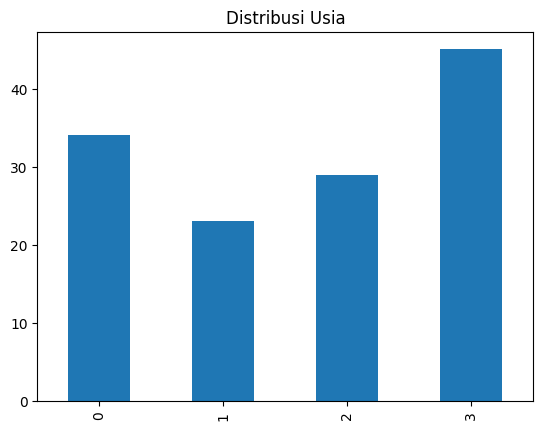

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame pertama
df_pandas = pd.DataFrame({
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45]
})

# DataFrame kedua
df_pandas_2 = pd.DataFrame({
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]
})

# Join antar DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Statistik deskriptif
print(df_pandas.describe())

# Visualisasi usia
df_pandas['Usia'].plot(kind='bar', title="Distribusi Usia")
plt.show()


In [6]:
# Konversi dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()
print(df_pandas_from_spark)

# Konversi dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)
df_spark_from_pandas.show()

# Analisis rata-rata usia dengan Pandas
print("Rata-rata Usia:", df_pandas_from_spark["Usia"].mean())


    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45
+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

Rata-rata Usia: 32.75


In [7]:
# Konversi PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Gabungkan dengan DataFrame Pandas asli
df_combined = pd.concat([df_pandas_from_spark, df_pandas], ignore_index=True)
print(df_combined)

# Cari nilai maksimum usia
print("Nilai maksimum usia:", df_combined["Usia"].max())

    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45
4    Ali    34
5   Budi    23
6  Citra    29
7   Dina    45
Nilai maksimum usia: 45
